In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(11)

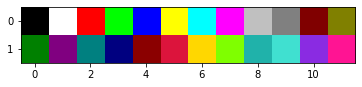

In [2]:
inputs = np.array([[0,0,0], [255,255,255],
          [255,0,0],          [0,255,0],
          [0,0,255],          [255,255,0],
          [0,255,255],          [255,0,255],
          [192,192,192],          [128,128,128],
          [128,0,0],          [128,128,0],
          [0,128,0],          [128,0,128],
          [0,128,128],          [0,0,128],
          [139,0,0],          [220,20,60],
          [255,215,0],          [127,255,0],
          [32,178,170],          [64,224,208],
          [138,43,226],          [255,20,147]])
inp = inputs/255
plt.imshow(inp.reshape(2,12,3))
plt.show()

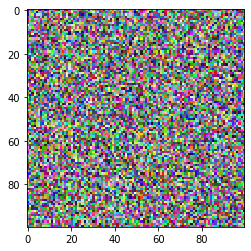

In [3]:
weightsshow = np.random.rand(100, 100, 3)
plt.imshow(weightsshow)
plt.show()

In [4]:
def som(inputs, sigzero, total_k):
    weights = np.random.rand(100, 100, 3)
    #array of neuron indexes (100*100*2)
    indexarray = np.mgrid[0:100,0:100].T
    indexarray[:,:,[0, 1]] = indexarray[:,:,[1, 0]]
    for k in range(total_k):
        sigma = sigzero*np.exp(-k/total_k)
        alpha = .8*np.exp(-k/total_k)
        for x in inputs:
            #euclidean distance (100*100)
            distarr = np.linalg.norm(x - weights, axis=2)
            #index of winning neuron (2)
            winid = np.unravel_index(distarr.argmin(), distarr.shape)
            #index distance from winning neuron (100*100)
            distwin = np.linalg.norm(winid - indexarray, axis = 2)
            #neighborhood influence (100*100)
            nalpha = np.exp(-distwin**2/(2*sigma**2))
            #neighborhood influence on RGB (100*100*3)
            nalp = np.stack((nalpha,)*3, axis=-1)
            #difference in RGB (100*100*3)
            diff = x - weights
            change = diff*alpha*nalp
            weights = weights + change
            #save weights for different epochs
            if k == 20:
                w20 = weights
            if k == 40:
                w40 = weights
            if k == 100:
                w100 = weights
            if k == total_k-1:
                w1000 = weights
    return w20, w40, w100, w1000

In [5]:
# trying my som on different sigmas, keeping 5x4 outputs in array of weights
sigmas = [1, 10, 30, 50, 70]
w20 = np.random.rand(5, 100, 100, 3)
w40 = np.random.rand(5, 100, 100, 3)
w100 = np.random.rand(5, 100, 100, 3)
w1000 = np.random.rand(5, 100, 100, 3)
i = 0
for s in sigmas:
    w20[i], w40[i], w100[i], w1000[i] = som(inp, s, 1000)
    i = i + 1

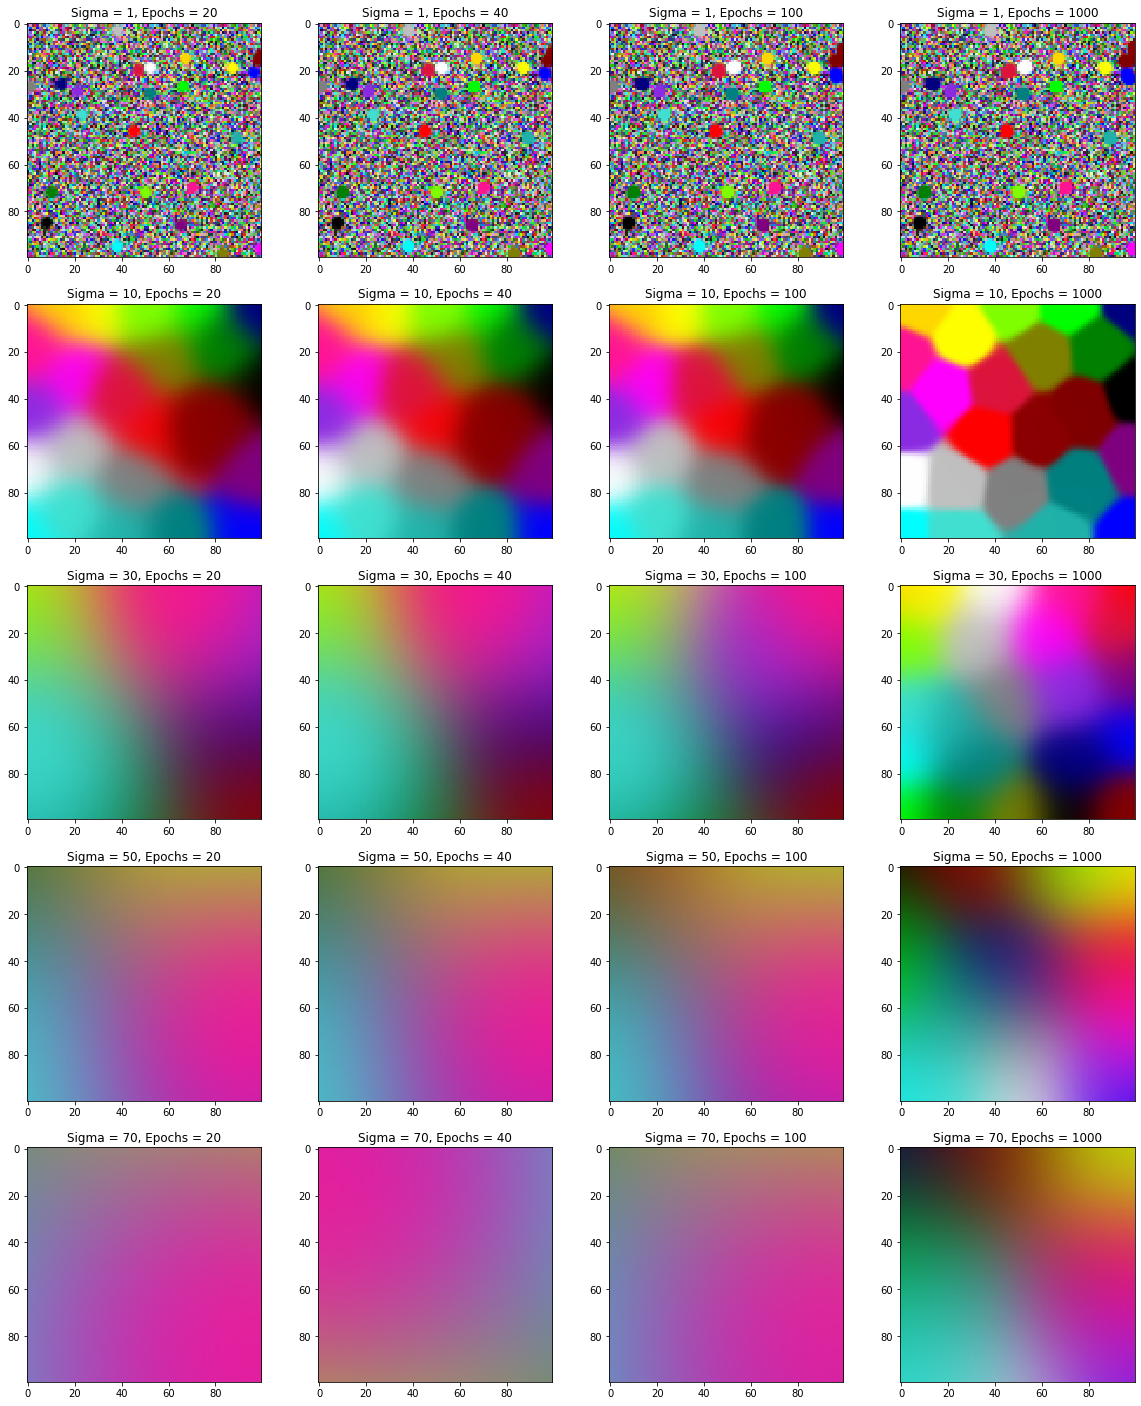

In [6]:
# plotting all my weights
i = 0
f, axarr = plt.subplots(5,4,figsize=(20,25))
for s in sigmas:
    axarr[i,0].imshow(w20[i])
    axarr[i,0].title.set_text('Sigma = %s, Epochs = 20' %s)
    axarr[i,1].imshow(w40[i])
    axarr[i,1].title.set_text('Sigma = %s, Epochs = 40' %s)
    axarr[i,2].imshow(w100[i])
    axarr[i,2].title.set_text('Sigma = %s, Epochs = 100' %s)
    axarr[i,3].imshow(w1000[i])
    axarr[i,3].title.set_text('Sigma = %s, Epochs = 1000' %s)
    i = i + 1
plt.show()

To try yourselves:

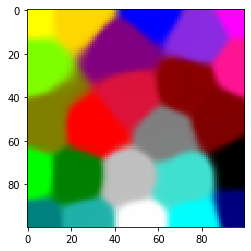

In [7]:
# 4 weight arrays for different epochs = som (your input colors, sigma , epochs)
w1, w2, w3, w4 = som(inp, 10, 1000)
plt.imshow(w4)
plt.show()

B:

Higher sigmas homogenize the colors rapidly which is why you cant distinguish the clusters as well as in sigma 10 or sigma 1. 

The neighborhood on sigma 1 is too small to cover the whole area while sigma 70 neighborhoods are too big and all clusters are affecting each other.